In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [3]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.isnull().mean()*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

## UNIVARIATE ANALYSIS

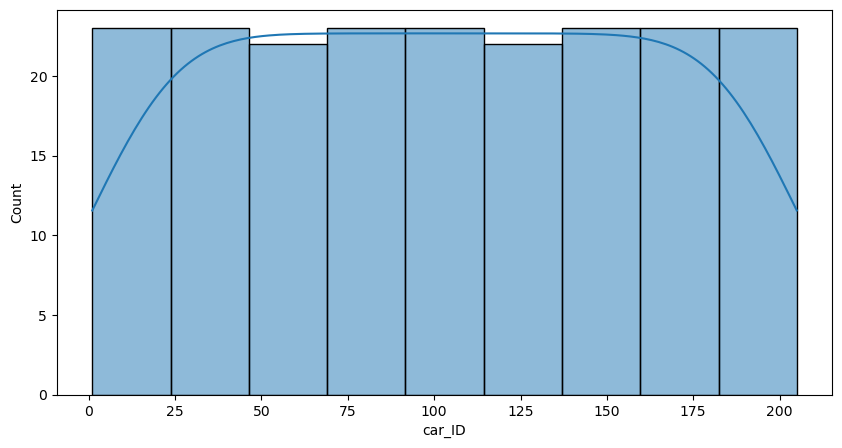

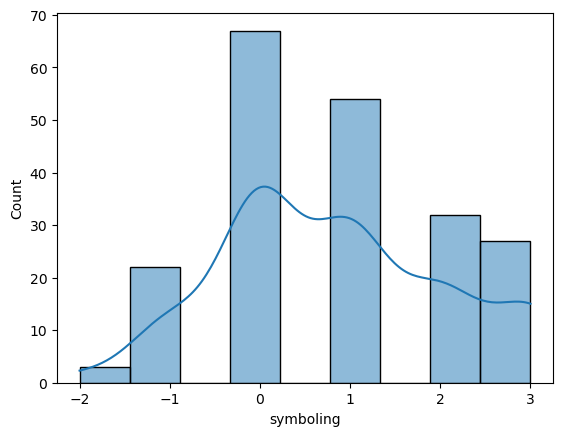

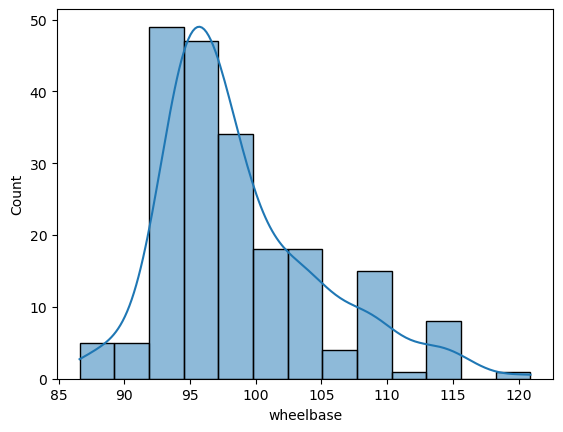

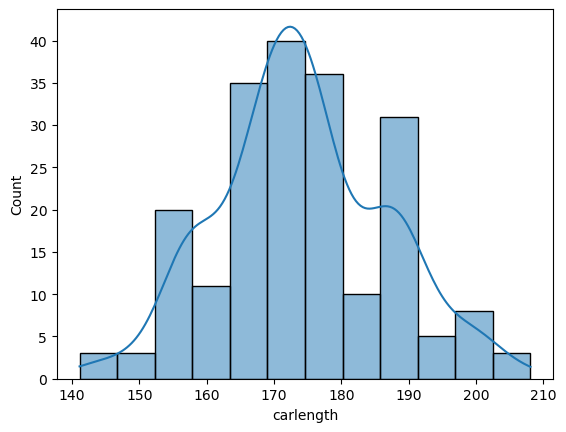

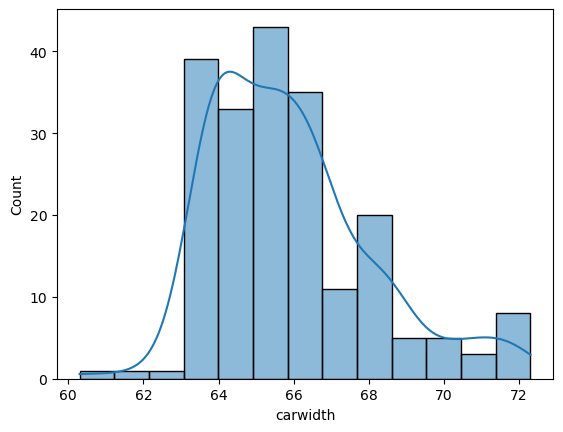

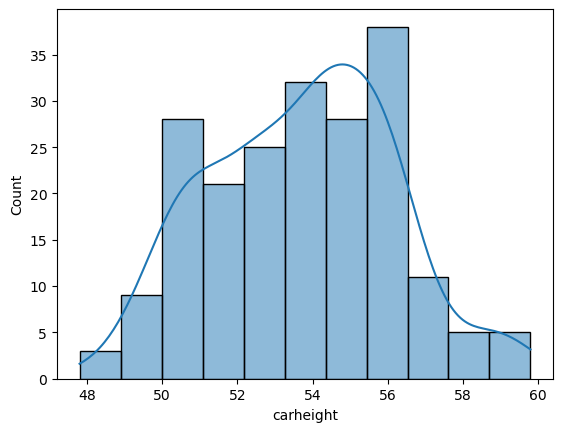

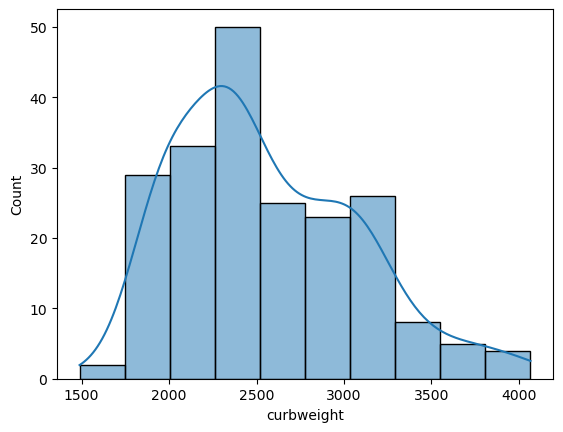

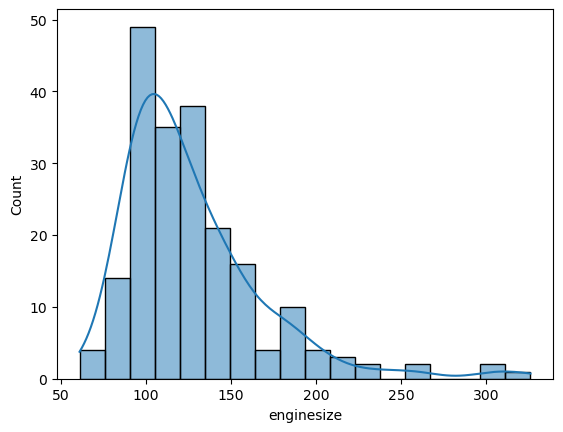

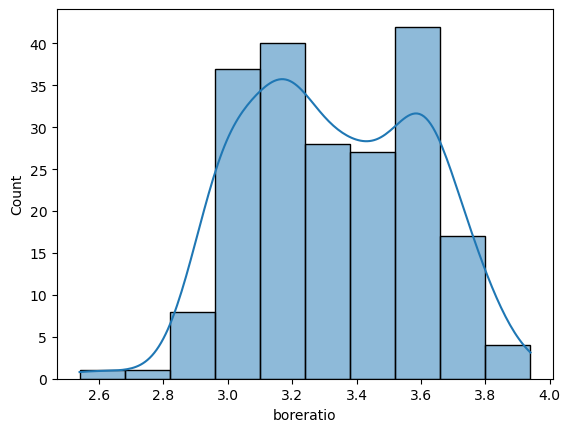

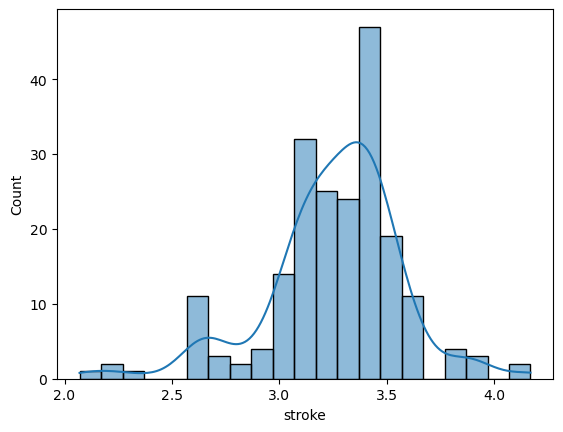

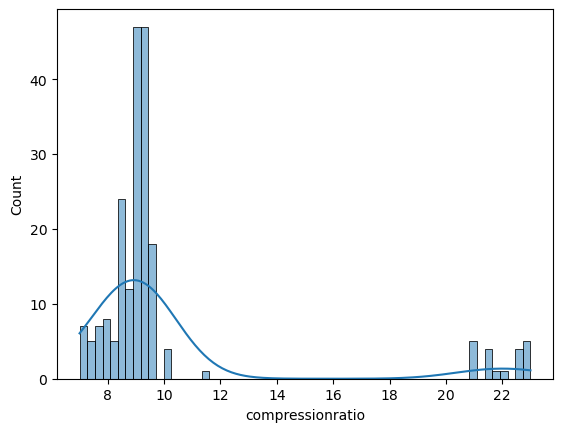

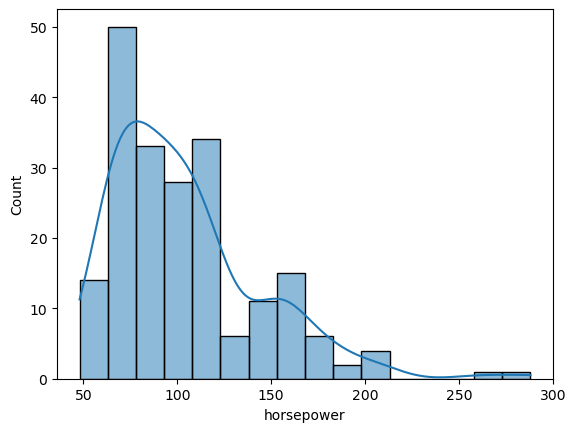

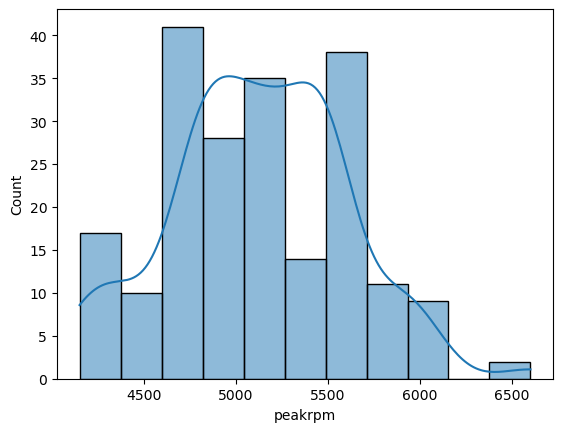

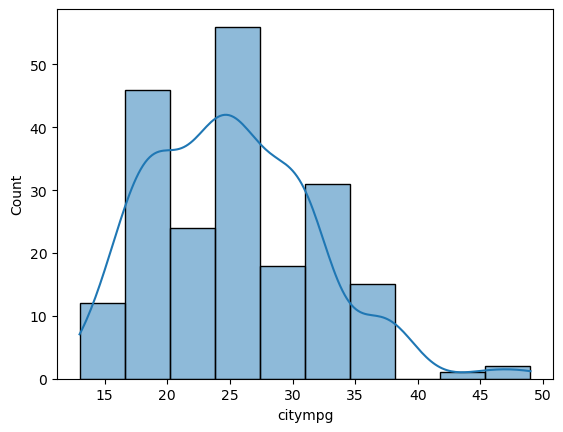

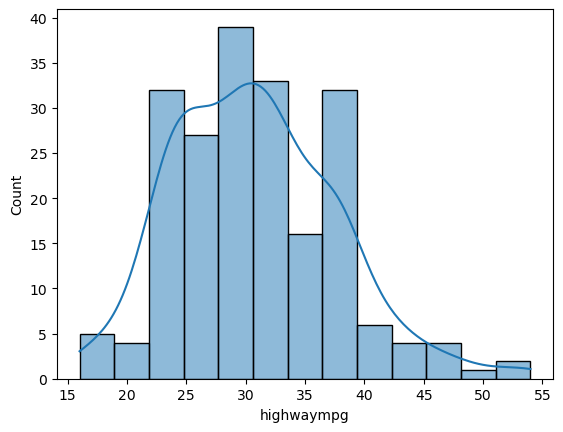

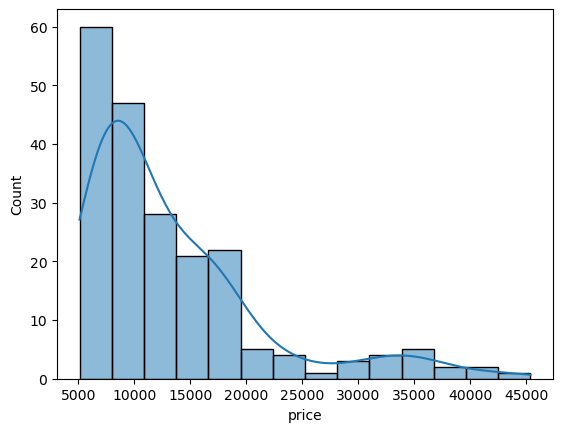

In [8]:
plt.figure(figsize=(10,5))
for i in data.columns:
    if data[i].dtype !="object":
        sns.histplot(data=data[i],kde=True)
        plt.show()

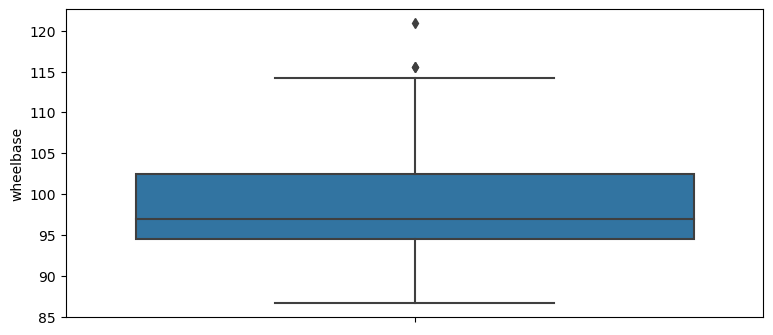

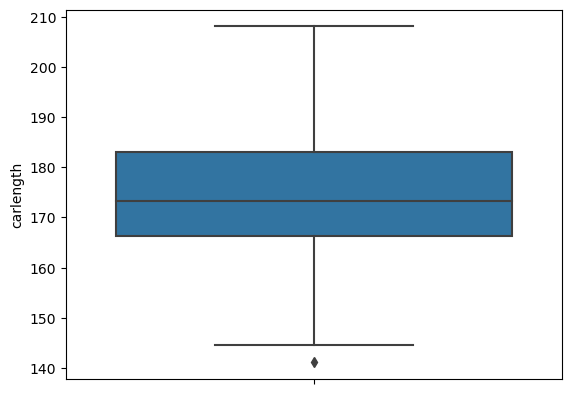

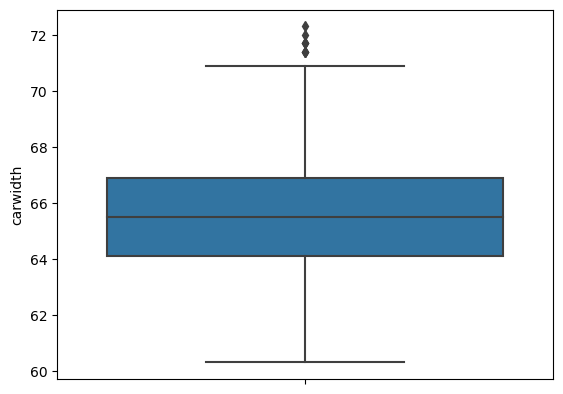

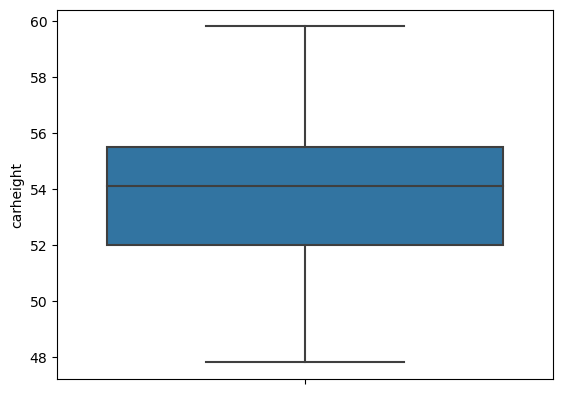

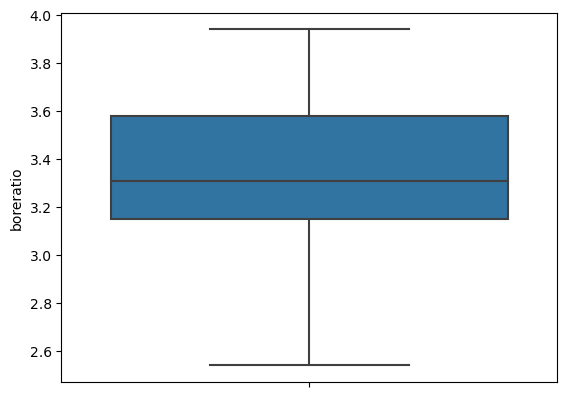

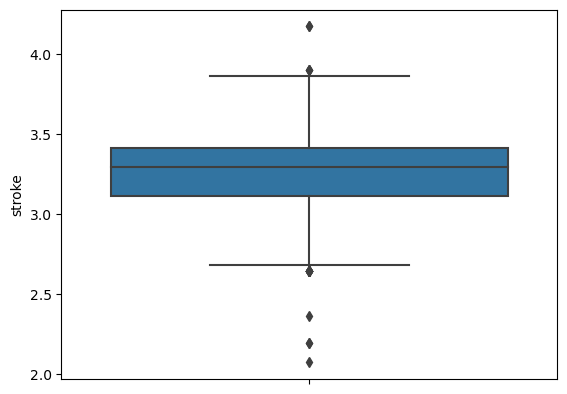

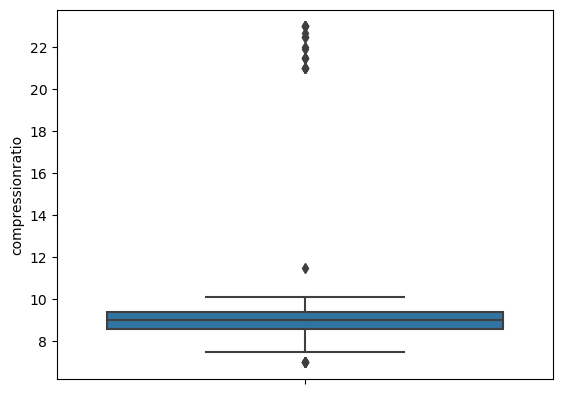

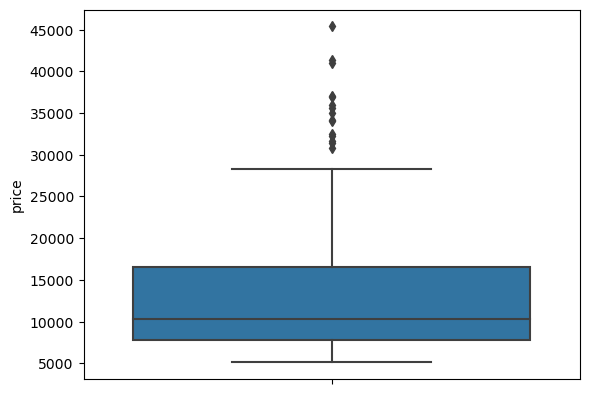

In [9]:
plt.figure(figsize=(9,4))
for i in data.columns:
    if data[i].dtype == float:
        sns.boxplot(y=data[i])
        plt.show()

<b> OUTLIER TREATMENT

In [10]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col,[75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [11]:
UL, LL = outlier_limit(data['price'])
data['price'] = np.where((data['price']>UL) | (data['price']<LL),np.nan,data['price'])

In [12]:
data.isnull().mean()*100

car_ID              0.000000
symboling           0.000000
CarName             0.000000
fueltype            0.000000
aspiration          0.000000
doornumber          0.000000
carbody             0.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.000000
carlength           0.000000
carwidth            0.000000
carheight           0.000000
curbweight          0.000000
enginetype          0.000000
cylindernumber      0.000000
enginesize          0.000000
fuelsystem          0.000000
boreratio           0.000000
stroke              0.000000
compressionratio    0.000000
horsepower          0.000000
peakrpm             0.000000
citympg             0.000000
highwaympg          0.000000
price               7.317073
dtype: float64

In [13]:
data.dropna(inplace=True)

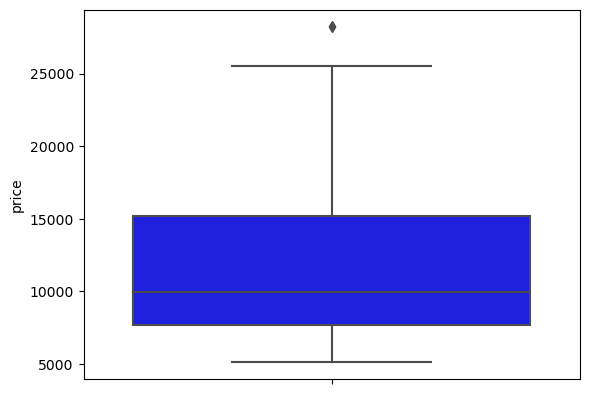

In [14]:
sns.boxplot(data=data,y='price',color='blue')
plt.show()

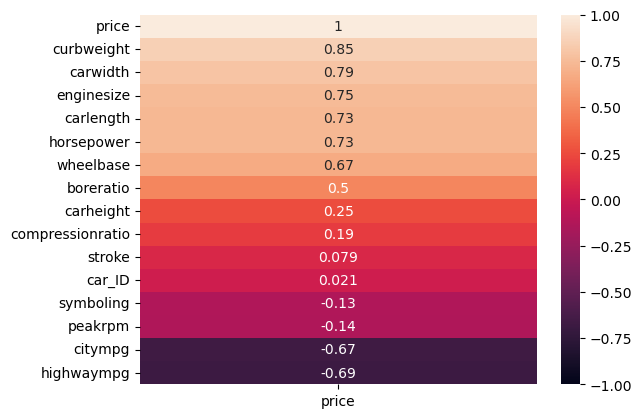

In [15]:
sns.heatmap(data.corr()[['price']].sort_values(by=['price'],
                                                        ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

In [41]:
data.corr=(data.corr()[['price']]>0.75).reset_index()
data.corr

,index,price
0,car_ID,False
1,symboling,False
2,wheelbase,False
3,carlength,False
4,carwidth,True
5,carheight,False
6,curbweight,True
7,enginesize,False
8,boreratio,False
9,stroke,False


In [46]:
data.corr[data.corr.price ==True]

,index,price
4,carwidth,True
6,curbweight,True
15,price,True


In [47]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
x=data[['curbweight','citympg']].values
y=data[['price']].values

### Model Building

In [18]:
models={
    "LinearRegression":LinearSVR(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
}

In [19]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    print(f'Cross validation Model is {name}')
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print(f'Average RMSE: {rmse_avg}')
    print("-"*100)

Cross validation Model is LinearRegression
Average RMSE: 3270.582543958999
----------------------------------------------------------------------------------------------------
Cross validation Model is Ridge
Average RMSE: 2659.781464756671
----------------------------------------------------------------------------------------------------
Cross validation Model is LinearSVR
Average RMSE: 2982.5013698095313
----------------------------------------------------------------------------------------------------
Cross validation Model is DecisionTreeRegressor
Average RMSE: 4010.633565453667
----------------------------------------------------------------------------------------------------
Cross validation Model is GradientBoostingRegressor
Average RMSE: 3280.115645115207
----------------------------------------------------------------------------------------------------
Cross validation Model is AdaBoostRegressor
Average RMSE: 2784.3934489542453
----------------------------------------------

### Best Model is Found to be Linear_SVR

In [20]:
model = LinearSVR()

<B> Train Test Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42, shuffle=True)

In [25]:
model.fit(x_train, y_train)

LinearSVR()

In [26]:
y_pred=model.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.6142548133008903

In [29]:
model.score(x_train,y_train)

0.34238556905196604

In [32]:
model.score(x_test,y_test)

0.6142548133008903

In [33]:
OUTPUT=pd.DataFrame(zip(y_pred,y_test), columns=['ACTUAL', 'PREDICTION'], dtype = float)

In [34]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,7801.576396,9980.0
1,12405.901726,13415.0
2,6388.420976,7609.0
3,3830.980973,5389.0
4,12699.896530,16900.0


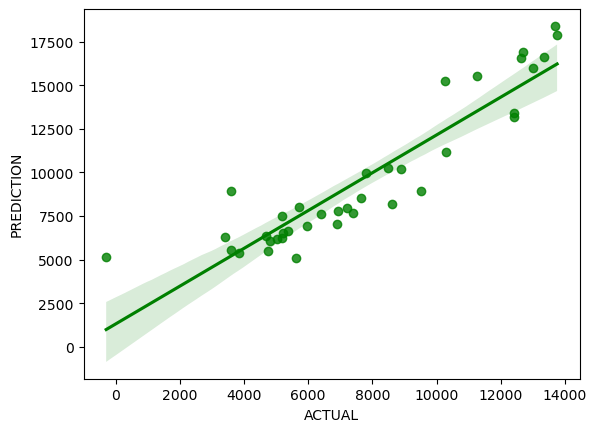

In [36]:
sns.regplot(data=OUTPUT,x= 'ACTUAL',y= 'PREDICTION',color='green')
plt.show()